In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
np.set_printoptions(precision=2)

## Initializing the training set and model parameters

In [6]:
x = np.arange(1, 20, 1)
X_train = np.column_stack((x**2, x))
y_train = x ** 2 + x
w_init = np.array([1, 2])
b_init = 5

In [8]:
print(X_train)

[[  1   1]
 [  4   2]
 [  9   3]
 [ 16   4]
 [ 25   5]
 [ 36   6]
 [ 49   7]
 [ 64   8]
 [ 81   9]
 [100  10]
 [121  11]
 [144  12]
 [169  13]
 [196  14]
 [225  15]
 [256  16]
 [289  17]
 [324  18]
 [361  19]]


In [9]:
scalar = StandardScaler()
X_norm = scalar.fit_transform(X_train)
print(X_norm)

[[-1.14 -1.64]
 [-1.12 -1.46]
 [-1.07 -1.28]
 [-1.01 -1.1 ]
 [-0.93 -0.91]
 [-0.83 -0.73]
 [-0.72 -0.55]
 [-0.59 -0.37]
 [-0.43 -0.18]
 [-0.27  0.  ]
 [-0.08  0.18]
 [ 0.12  0.37]
 [ 0.35  0.55]
 [ 0.59  0.73]
 [ 0.84  0.91]
 [ 1.12  1.1 ]
 [ 1.41  1.28]
 [ 1.72  1.46]
 [ 2.05  1.64]]


In [10]:
X_features = ['area', 'height']

In [11]:
print(f"Peak to Peak range by column in Raw X: {np.ptp(X_train, axis=0)}")
print(f"Peak to Peak range by column in Normalized X: {np.ptp(X_norm, axis=0)}")

Peak to Peak range by column in Raw X: [360  18]
Peak to Peak range by column in Normalized X: [3.19 3.29]


## Create and fit regression model

In [32]:
sgdr = SGDRegressor(max_iter=100000)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"number of iterations completed : {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor(max_iter=100000)
number of iterations completed : 4766, number of weight updates: 90555.0


## View Parameters

In [33]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"Model parameters: w: {w_norm}, b: {b_norm}")

Model parameters: w: [105.3   12.92], b: [140.]


## Make Predictions

In [34]:
y_pred_sgdr = sgdr.predict(X_norm)
y_pred = np.dot(X_norm, w_norm) + b_norm

In [35]:
(y_pred_sgdr == y_pred).all()

np.True_

## Plot results

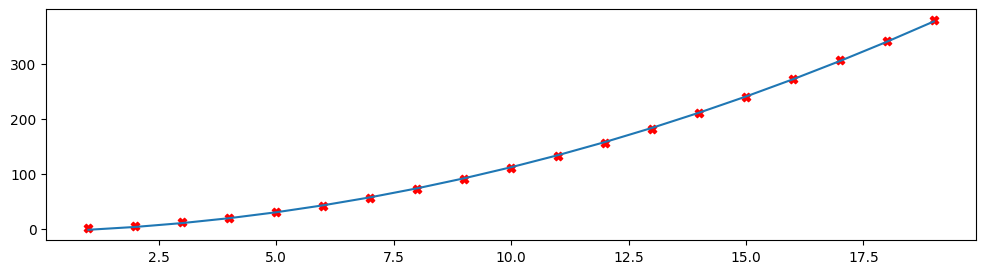

In [36]:
fig, ax = plt.subplots(1, 1, figsize = (12, 3))
ax.scatter(x, y, marker = 'X', color = 'red')
ax.plot(x, y_pred_sgdr)


## Was able to build it using my own custom data!